In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from ipywidgets import interact_manual 
from tensorflow.keras.datasets import fashion_mnist # 讀入 Fashion MNSIT 數據集

In [13]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [14]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料',f'測試資料總筆數為 {len(x_test)} 筆資料',sep='\n')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [15]:
labelname_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [19]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape,y_test.shape,sep='\n')

(60000, 10)
(10000, 10)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(100,input_dim=784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='mse',optimizer=SGD(lr=0.09),metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                610       
Total params: 98,930
Trainable params: 98,930
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_train,batch_size=125,epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0798 - accuracy: 0.3460
Epoch 2/25
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0533 - accuracy: 0.6406
Epoch 3/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0396 - accuracy: 0.7250
Epoch 4/25
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0344 - accuracy: 0.7690
Epoch 5/25
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0312 - accuracy: 0.7926
Epoch 6/25
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0291 - accuracy: 0.8053
Epoch 7/25
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0275 - accuracy: 0.8145
Epoch 8/25
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0263 - accuracy: 0.8223
Epoch 9/25
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0254 - accuracy: 0.8271
Epoch 10/25
60

In [25]:
result = model.predict_classes(x_test)

In [26]:
def show_xy(測試編號=0):
    ax = plt.gca()
    X = x_test[測試編號]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print(f'神經網路預測的答案為: {labelname_dict[result[測試編號]]}')
interact_manual(show_xy,測試編號=(0,9999));

interactive(children=(IntSlider(value=0, description='測試編號', max=9999), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

神經網路預測是: Sandal


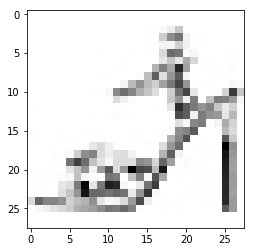

In [27]:
n=2744
print('神經網路預測是:',labelname_dict[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

# 改變類神經網路的地方
* Hidden layer = 5
* learning rate = 0.09
* batch size = 125
* epochs = 25